In [42]:
import pandas as pd


$x^2$

In [43]:
traindata2015 = pd.read_csv('data/trainLabels15.csv')
testdata2015 = pd.read_csv('data/testLabels15.csv')
traindata2019 = pd.read_csv('data/trainLabels19.csv')
testdata2019 = pd.read_csv('data/testLabels15.csv')
mesidor_data = pd.read_csv('data/messidor_data.csv')

In [44]:
mesidor_data.head()

,image_id,adjudicated_dr_grade,adjudicated_dme,adjudicated_gradable
0,20051020_43808_0100_PP.png,0.0,0.0,1
1,20051020_43832_0100_PP.png,1.0,0.0,1
2,20051020_43882_0100_PP.png,1.0,0.0,1
3,20051020_43906_0100_PP.png,2.0,1.0,1
4,20051020_44261_0100_PP.png,0.0,0.0,1


In [45]:
path_to_messidor = 'data/messidor-2'
path_to_test_19 = 'data/resized test 19'
path_to_test_15 = 'data/resized test 15'
path_to_train_19 = 'data/resized train 19'
path_to_train_15 = 'data/resized train 15'

In [46]:
traindata2015.columns

Index(['image', 'level'], dtype='object')

In [47]:
Training_DataFrame  = pd.DataFrame({
    'image_id': [],
    'diagnosis': [],
    'dataSet': []
})

In [48]:
mesidor_data = mesidor_data.drop(columns=['adjudicated_dme', 'adjudicated_gradable'])
traindata2015 = traindata2015.rename(columns ={"image": "image_id", "level": "diagnosis"})
testdata2015 = testdata2015.rename(columns ={"image": "image_id", "level": "diagnosis"})
testdata2019 = testdata2019.rename(columns ={"id_code": "image_id"})
traindata2019 = traindata2019.rename(columns ={"id_code": "image_id"})
mesidor_data = mesidor_data.rename(columns ={"image_id": "image_id", "adjudicated_dr_grade": "diagnosis"})








In [49]:
traindata2019['dataSet'] = path_to_train_19
mesidor_data['dataSet'] = path_to_messidor
traindata2015['dataSet'] = path_to_train_15
testdata2015['dataSet'] = path_to_test_15
testdata2019['dataSet'] = path_to_test_19



In [50]:
traindata2019.tail()

,image_id,diagnosis,dataSet
3657,ffa47f6a7bf4,2,data/resized train 19
3658,ffc04fed30e6,0,data/resized train 19
3659,ffcf7b45f213,2,data/resized train 19
3660,ffd97f8cd5aa,0,data/resized train 19
3661,ffec9a18a3ce,2,data/resized train 19


In [51]:
Training_DataFrame = Training_DataFrame.append(traindata2019, sort=False,ignore_index=True)
Training_DataFrame = Training_DataFrame.append(traindata2015, sort=False,ignore_index=True)
Training_DataFrame = Training_DataFrame.append(mesidor_data, sort=False,ignore_index=True)
Training_DataFrame = Training_DataFrame.append(testdata2015, sort=False,ignore_index=True)

In [52]:
Index_of_null_vals = Training_DataFrame[Training_DataFrame['diagnosis'].isnull()].index

In [53]:
Training_DataFrame.drop(Index_of_null_vals)

,dataSet,diagnosis,image_id,Usage
0,data/resized train 19,2.0,000c1434d8d7,NaN
1,data/resized train 19,4.0,001639a390f0,NaN
2,data/resized train 19,1.0,0024cdab0c1e,NaN
3,data/resized train 19,0.0,002c21358ce6,NaN
4,data/resized train 19,0.0,005b95c28852,NaN
...,...,...,...,...
94107,data/resized test 15,0.0,44346_right,Private
94108,data/resized test 15,0.0,44350_left,Private
94109,data/resized test 15,0.0,44350_right,Private
94110,data/resized test 15,0.0,44351_left,Public


<BarContainer object of 5 artists>

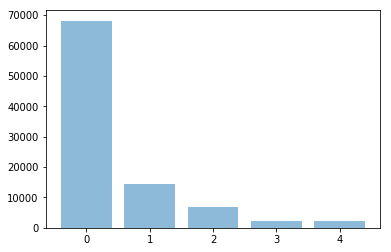

In [56]:
import matplotlib.pyplot as plt;
plt.bar([0,1,2,3,4],  list(Training_DataFrame['diagnosis'].value_counts()),align='center', alpha=0.5)


In [57]:
d0,d1,d2,d3,d4 = Training_DataFrame['diagnosis'].value_counts()

In [58]:
d1

14499

In [59]:
_d0 = Training_DataFrame[Training_DataFrame['diagnosis'] == 0].sample(d1)
_d1 = Training_DataFrame[Training_DataFrame['diagnosis'] == 1].sample(d1,replace=True)
_d2 = Training_DataFrame[Training_DataFrame['diagnosis'] == 2].sample(d1,replace=True)
_d3 = Training_DataFrame[Training_DataFrame['diagnosis'] == 3].sample(d1,replace=True)
_d4 = Training_DataFrame[Training_DataFrame['diagnosis'] == 4].sample(d1,replace=True)

In [61]:
list(Balance_Df['diagnosis'].value_counts())

[14499, 14499, 14499, 14499, 14499]

In [62]:
Balance_Df = _d0
Balance_Df = Balance_Df.append(_d1)
Balance_Df = Balance_Df.append(_d2)
Balance_Df = Balance_Df.append(_d3)
Balance_Df = Balance_Df.append(_d4)

In [63]:
from sklearn.utils import shuffle

Balance_Df = shuffle(Balance_Df)

<BarContainer object of 5 artists>

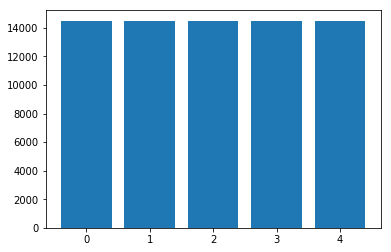

In [64]:
import matplotlib.pyplot as plt;
plt.bar([0,1,2,3,4], list(Balance_Df['diagnosis'].value_counts()),align='center')

In [67]:
Training_DataFrame['diagnosis'].value_counts()

0.0    68165
2.0    14499
1.0     6845
3.0     2355
4.0     2244
Name: diagnosis, dtype: int64

In [68]:
Balance_Df['diagnosis'].value_counts()

4.0    14499
3.0    14499
2.0    14499
0.0    14499
1.0    14499
Name: diagnosis, dtype: int64

In [69]:
Balance_Df.head()

,dataSet,diagnosis,image_id,Usage
44799,data/resized test 15,1.0,3568_right,Private
90387,data/resized test 15,3.0,41266_right,Private
13376,data/resized train 15,1.0,12233_left,NaN
5631,data/resized train 15,0.0,2450_right,NaN
25172,data/resized train 15,2.0,27098_left,NaN


In [38]:
Training_DataFrame['image_id']

0        000c1434d8d7
1        001639a390f0
2        0024cdab0c1e
3        002c21358ce6
4        005b95c28852
             ...     
94107     44346_right
94108      44350_left
94109     44350_right
94110      44351_left
94111     44351_right
Name: image_id, Length: 94112, dtype: object

In [72]:
Balance_Df["Path_to_image"] = Balance_Df["dataSet"]+ "/" + Balance_Df['image_id'] + ".png"

In [75]:
Balance_Df.head()
Balance_Df.drop('Usage',axis=1)
Balance_Df.drop('dataSet',axis=1)

,diagnosis,image_id,Usage,Path_to_image
44799,1.0,3568_right,Private,data/resized test 15/3568_right.png
90387,3.0,41266_right,Private,data/resized test 15/41266_right.png
13376,1.0,12233_left,NaN,data/resized train 15/12233_left.png
5631,0.0,2450_right,NaN,data/resized train 15/2450_right.png
25172,2.0,27098_left,NaN,data/resized train 15/27098_left.png
...,...,...,...,...
38245,0.0,43708_right,NaN,data/resized train 15/43708_right.png
66074,2.0,21240_left,Private,data/resized test 15/21240_left.png
25014,2.0,26905_left,NaN,data/resized train 15/26905_left.png
83686,3.0,35653_left,Private,data/resized test 15/35653_left.png


In [77]:
Balance_Df.to_csv("allCells.csv")